In [1]:
%run notebook.config.ipy


Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust




Attaching package: ‘reshape2’

The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast




Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



Loading required package: DBI


set database db: ../csvdb
set database anndb: /gfs/mirror/annotations/mm10_ensembl78/csvdb


In [2]:
statement = '''select * from qc_summary'''

df = DB.fetch_DataFrame(statement,db)

data = pd.melt(df,id_vars="cell")
data.head()

,cell,variable,value
0,L16755_7-0,fraction_spike,0.348932
1,L16755_7-1,fraction_spike,0.169597
2,L16755_7-10,fraction_spike,0.938686
3,L16755_7-11,fraction_spike,0.285408
4,L16755_7-12,fraction_spike,0.758213


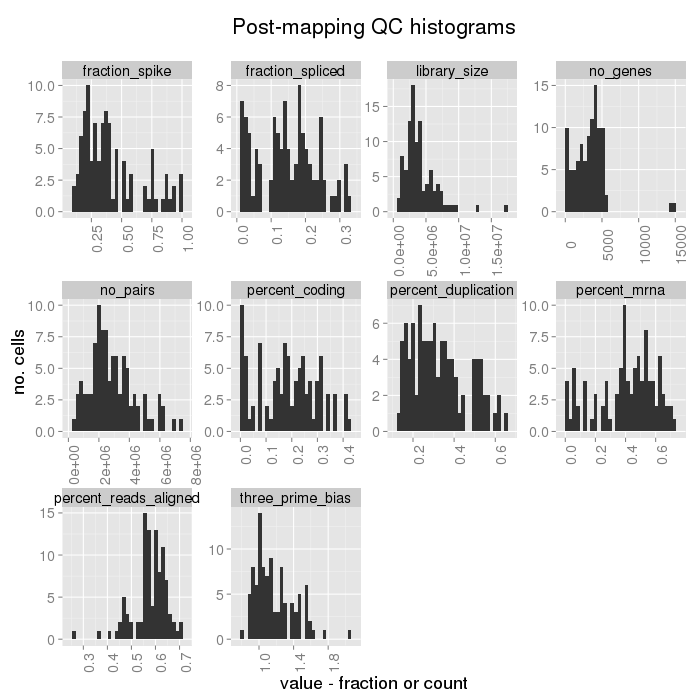

In [5]:
%%R -i data -w 700 -h 700

gp <- ggplot(data, aes(x=value))
gp <- gp + facet_wrap(~variable, scales="free")
gp <- gp + geom_histogram(nbin=200)
gp <- gp + theme(axis.text.x=element_text(angle=90))
gp <- gp + ggtitle("Post-mapping QC histograms\n")
gp <- gp + ylab("no. cells") + xlab("value - fraction or count")

suppressMessages(print(gp))
#ggsave("post_mapping_qc.pdf", gp, device=cairo_pdf)